In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import sys
sys.path.append("../")

from kernel import InverseMultiquadricKernelPytouch
from mtgp import MultiTaskGaussianProcessImplicitSurfaces

import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
plt.style.use("ggplot")

%matplotlib inline

In [2]:
def plot_all(model, x1, y1, x2, y2, rate):
    x   = np.linspace(-10, 70, 200)[:, None] * rate
    y   = np.linspace(-10, 70, 200)[:, None] * rate
    x,y = np.meshgrid(x, y)
    xx  = x.ravel()[:, None]
    yy  = y.ravel()[:, None]
    XX  = np.concatenate([xx, yy], 1)
    XX  = torch.from_numpy(XX).float()

    mm1, ss1 = model.predict(XX, 0)
    mm2, ss2 = model.predict(XX, 1)

    d = np.where(abs(mm2.T[0]) < 0.1)
    e = xx.T[0][d]
    f = yy.T[0][d]

    plt.xlim(-0.1, 0.7)
    plt.ylim(-0.1, 0.7)


    mm1 = mm1.reshape(x.shape)
    mm2 = mm2.reshape(x.shape)

    z = mm2.numpy()

    xyz = plt.pcolormesh(x, y, z, cmap='Greens', shading="gouraud", vmax=z.max(), vmin=z.min())

    x2_ = np.concatenate([np.ones(N1)*12, np.linspace(12, 20, N2//2), np.ones(N2)*20, np.linspace(20, 40, N2), np.ones(N2)*40, np.linspace(40, 48, N2//2), np.ones(N1)*48]) * rate
    y2_ = np.concatenate([np.linspace(15, 47, N1), np.ones(N2//2)*47, np.linspace(47, 20, N2), np.ones(N2)*20, np.linspace(20, 47, N2), np.ones(N2//2)*47, np.linspace(47, 15, N1)]) * rate
    
    plt.plot(x2_, y2_, linewidth=5, c='black')
    
    plt.plot(x1_0, y1_0, linewidth=5, alpha=0.5, c='red')
    plt.plot(x2_0, y2_0, linewidth=5, c='blue')
    plt.scatter(e,f, s=10, c='navy')
    # plt.scatter(e,f)
    #     plt.colorbar(xyz)
    # plt.savefig('mtgpis.png')
    plt.show()

    # %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1.ravel(), y1.ravel(), np.array(Y1).ravel())
    ax.scatter(x2.ravel(), y2.ravel(), np.array(Y2).ravel())

    surf = ax.plot_surface(x, y, z, cmap='bwr', linewidth=0)
    fig.colorbar(surf)
    # plt.savefig('mtgpis_3d.png')
    plt.show()

In [3]:
N1 = 10
N2 = 10
rate = 0.01 # data scale
%matplotlib inline

In [4]:
x1_0 = (np.concatenate([np.linspace(10, 50, N1), np.ones(N1)*50, np.linspace(50, 10, N1), np.ones(N1)*10]) ) * rate
x1_1 = (np.concatenate([np.linspace(8, 52, N1), np.ones(N1)*52, np.linspace(52, 8, N1), np.ones(N1)*8]) ) * rate
x1    = np.concatenate([x1_0, x1_1])[:, None]

y1_0 = (np.concatenate([np.ones(N1)*10, np.linspace(10, 50, N1), np.ones(N1)*50, np.linspace(50, 10, N1)]) ) * rate
y1_1 = (np.concatenate([np.ones(N1)*8, np.linspace(8, 52, N1), np.ones(N1)*52, np.linspace(52, 8, N1)]) ) * rate
y1    = np.concatenate([y1_0, y1_1])[:, None]

X1 = np.concatenate([x1,y1],1)
Y1 = np.concatenate([np.zeros(len(x1_0)), np.ones(len(x1_1)) ])[:, None]
T1 = 0

In [5]:
step = 4
x2_0 = (np.concatenate([np.linspace(12, 48, N2), np.ones(N2)*48, np.linspace(48, 12, N2), np.ones(N2)*12]) ) * rate  
x2_1 = (np.concatenate([np.linspace(10, 50, N2), np.ones(N2)*50, np.linspace(50, 10, N2), np.ones(N2)*10]) ) * rate 
x2    = np.concatenate([x2_0, x2_1])[:, None]

y2_0 = (np.concatenate([np.ones(N2)*12, np.linspace(12, 25, N2), np.ones(N2)*25, np.linspace(25, 12, N2)]) ) * rate 
y2_1 = (np.concatenate([np.ones(N2)*10, np.linspace(10, 27, N2), np.ones(N2)*27, np.linspace(27, 10, N2)]) ) * rate 
y2    = np.concatenate([y2_0, y2_1])[:, None]


X2 = np.concatenate([x2,y2], 1)
Y2 = np.concatenate([np.zeros(N2*step), np.ones(N2*step)])[:, None]
T2 = 1

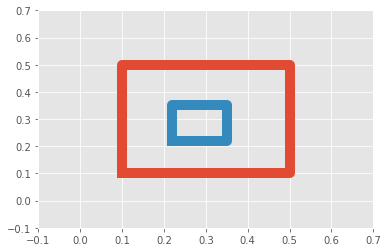

In [6]:
plt.plot(x1_0, y1_0, linewidth=10)
plt.plot(x2_0, y2_0, linewidth=10)
# plt.scatter(x1_0, y1_0)
# plt.scatter(x2_0, y2_0)

# plt.scatter(x2_1, y2_1)
# plt.scatter(x1_1, y1_1)

plt.xlim(-0.1, 0.7)
plt.ylim(-0.1, 0.7)
plt.show()